In [26]:
## bringing in data
from ucimlrepo import fetch_ucirepo

##bring in packages for dataframe + stats
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## for visualization
import matplotlib.pyplot as plt


# Variables of interest

dv = thalach
iv1 = cp
iv2 = exang

In [8]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets



In [13]:
df = pd.DataFrame(X)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [29]:
df.to_csv('heartdisease.csv')

In [18]:
print('Main DV: ', stats.shapiro(df['thalach']))

Main DV:  ShapiroResult(statistic=0.9764528870582581, pvalue=6.997911259531975e-05)


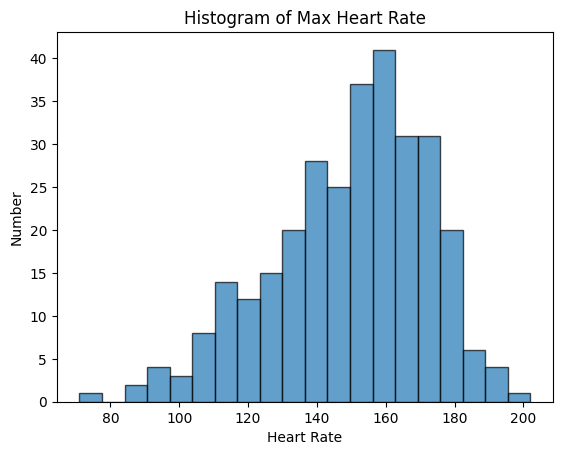

In [17]:
plt.hist(df['thalach'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Max Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Number')
plt.show()

In [19]:
groups = df.groupby(['cp', 'exang'])

for (cp_status, exang_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['thalach'])

    print(f"Group ({cp_status}, {exang_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (1, 0):
P-value from Shapiro-Wilk Test: 0.7870027422904968

Group (1, 1):
P-value from Shapiro-Wilk Test: 0.3818710148334503

Group (2, 0):
P-value from Shapiro-Wilk Test: 0.08241022378206253

Group (2, 1):
P-value from Shapiro-Wilk Test: 0.08400126546621323

Group (3, 0):
P-value from Shapiro-Wilk Test: 0.0004705539904534817

Group (3, 1):
P-value from Shapiro-Wilk Test: 0.9761034250259399

Group (4, 0):
P-value from Shapiro-Wilk Test: 0.010385693982243538

Group (4, 1):
P-value from Shapiro-Wilk Test: 0.9400795102119446



In [24]:
df['exang'] = df['exang'].astype(str)
df['cp'] = df['cp'].astype(str)

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: exang, Length: 303, dtype: object

In [25]:
# Levene's Test
stats.levene(
    df['thalach'][df['cp'] == '1'][df['exang'] == '0'],
    df['thalach'][df['cp'] == '2'][df['exang'] == '0'],
    df['thalach'][df['cp'] == '3'][df['exang'] == '0'],
    df['thalach'][df['cp'] == '4'][df['exang'] == '0'],
    df['thalach'][df['cp'] == '1'][df['exang'] == '1'],
    df['thalach'][df['cp'] == '2'][df['exang'] == '1'],
    df['thalach'][df['cp'] == '3'][df['exang'] == '1'],
    df['thalach'][df['cp'] == '4'][df['exang'] == '1'],
)




LeveneResult(statistic=1.1709610631268665, pvalue=0.3192871134812146)

## Interpretation of Levene + Shaprio

### Levene
Levene test shows us that the homogeneity of variance is equal, with a levene test statistic of 1.17, at a p-value equal to 0.31

### Shaprio
The shapiro tests showed us that 6/8 are normally distributed with p-values > .05, while *2 combinations* [list them out here] have p-values < .05 telling us that they NOT NORAMLLY distributed

In [27]:
model = ols('thalach ~ C(cp) * C(exang)', data=df).fit()


In [28]:
# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq     df          F    PR(>F)
C(cp)             9101.255743    3.0   7.161554  0.000117
C(exang)          8189.971905    1.0  19.333462  0.000015
C(cp):C(exang)    1366.383822    3.0   1.075174  0.359873
Residual        124966.842165  295.0        NaN       NaN
